In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


from scipy.stats import uniform
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.dummy import DummyClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC

#ocultando avisos
import warnings
warnings.filterwarnings('ignore')

#### DESCRISÃO DOS DADOS
1. Title of Database: Wine recognition data
	Updated Sept 21, 1998 by C.Blake : Added attribute information

2. Sources:
   (a) Forina, M. et al, PARVUS - An Extendible Package for Data
       Exploration, Classification and Correlation. Institute of Pharmaceutical
       and Food Analysis and Technologies, Via Brigata Salerno, 
       16147 Genoa, Italy.

   (b) Stefan Aeberhard, email: stefan@coral.cs.jcu.edu.au
   (c) July 1991
3. Past Usage:

   (1)
   S. Aeberhard, D. Coomans and O. de Vel,
   Comparison of Classifiers in High Dimensional Settings,
   Tech. Rep. no. 92-02, (1992), Dept. of Computer Science and Dept. of
   Mathematics and Statistics, James Cook University of North Queensland.
   (Also submitted to Technometrics).

   The data was used with many others for comparing various 
   classifiers. The classes are separable, though only RDA 
   has achieved 100% correct classification.
   (RDA : 100%, QDA 99.4%, LDA 98.9%, 1NN 96.1% (z-transformed data))
   (All results using the leave-one-out technique)

   In a classification context, this is a well posed problem 
   with "well behaved" class structures. A good data set 
   for first testing of a new classifier, but not very 
   challenging.

   (2) 
   S. Aeberhard, D. Coomans and O. de Vel,
   "THE CLASSIFICATION PERFORMANCE OF RDA"
   Tech. Rep. no. 92-01, (1992), Dept. of Computer Science and Dept. of
   Mathematics and Statistics, James Cook University of North Queensland.
   (Also submitted to Journal of Chemometrics).

   Here, the data was used to illustrate the superior performance of
   the use of a new appreciation function with RDA. 

4. Relevant Information:

   -- These data are the results of a chemical analysis of
      wines grown in the same region in Italy but derived from three
      different cultivars.
      The analysis determined the quantities of 13 constituents
      found in each of the three types of wines. 

   -- I think that the initial data set had around 30 variables, but 
      for some reason I only have the 13 dimensional version. 
      I had a list of what the 30 or so variables were, but a.) 
      I lost it, and b.), I would not know which 13 variables
      are included in the set.

   -- The attributes are (dontated by Riccardo Leardi, 
	riclea@anchem.unige.it )
 	1) Alcohol
 	2) Malic acid
 	3) Ash
	4) Alcalinity of ash  
 	5) Magnesium
	6) Total phenols
 	7) Flavanoids
 	8) Nonflavanoid phenols
 	9) Proanthocyanins
	10)Color intensity
 	11)Hue
 	12)OD280/OD315 of diluted wines
 	13)Proline            

5. Number of Instances

    class 1 59
    class 2 71
    class 3 48

6. Number of Attributes 
	
	13

7. For Each Attribute:

	All attributes are continuous
	
	No statistics available, but suggest to standardise
	variables for certain uses (e.g. for us with classifiers
	which are NOT scale invariant)

	NOTE: 1st attribute is class identifier (1-3)

8. Missing Attribute Values:

	None

9. Class Distribution: number of instances per class

    class 1 59
    class 2 71
    class 3 48

#### PRIMEIRAS IMPRESSOES DO CONJUNTO DE DADOS

In [5]:
#lendo os conjunto de dados(dataframe)
df = pd.read_csv("winequality_red.csv")

In [6]:
#conhecendo o conjunto de dados
df.head(20)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.580,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [7]:
#informaoes do conjunto de dados
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [8]:
#informaoes das variaveis
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [9]:
#Verificando a existencia de valores ausentes(missing)
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

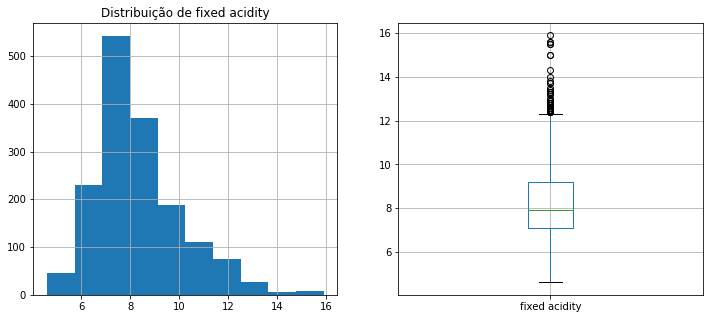

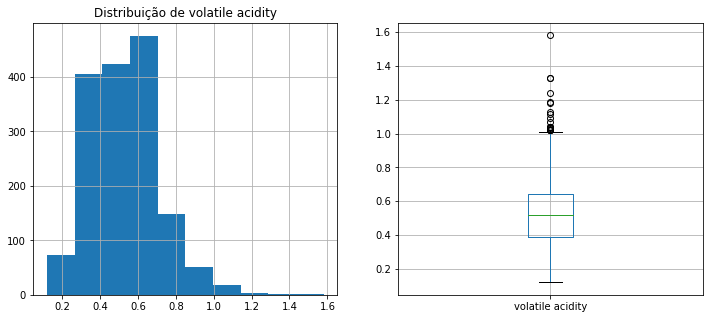

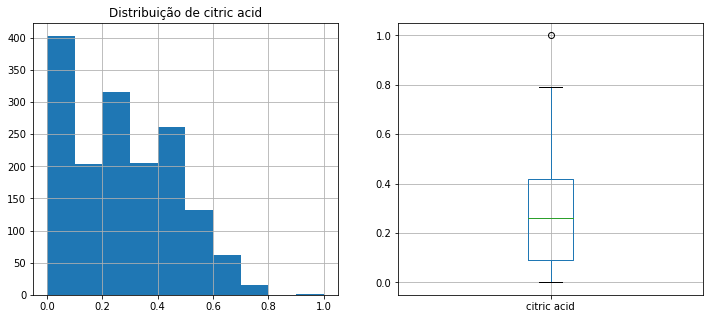

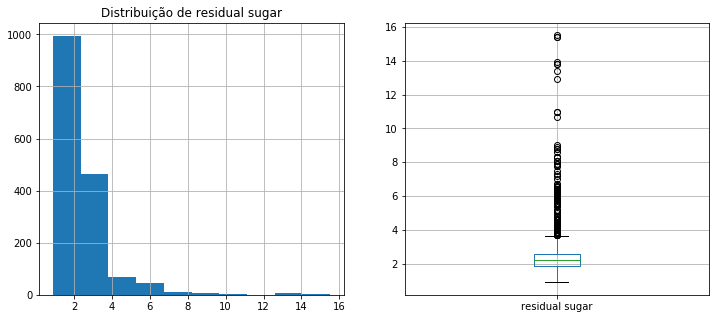

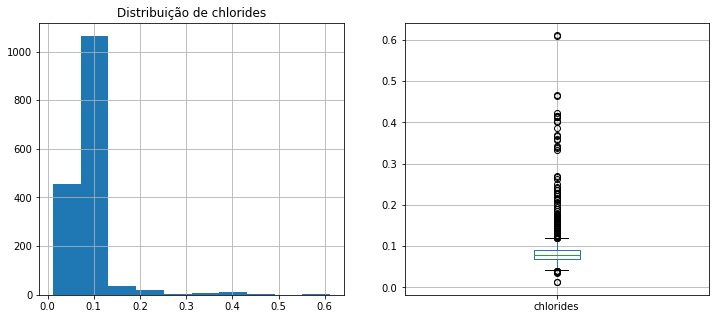

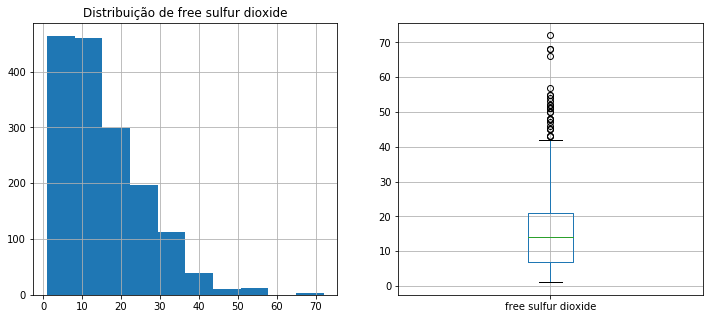

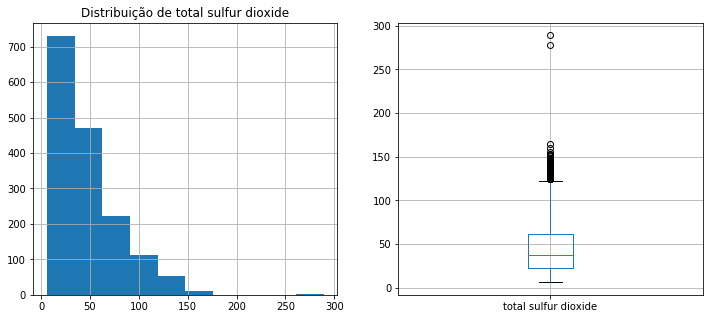

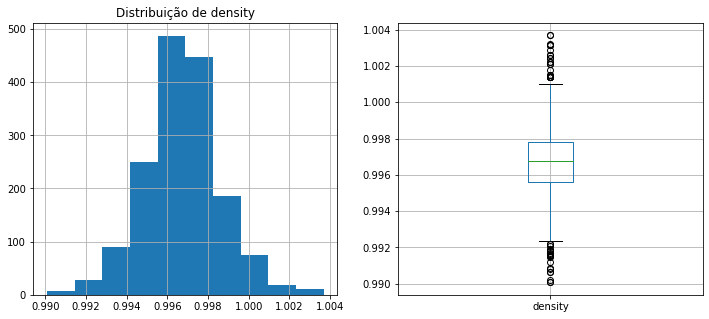

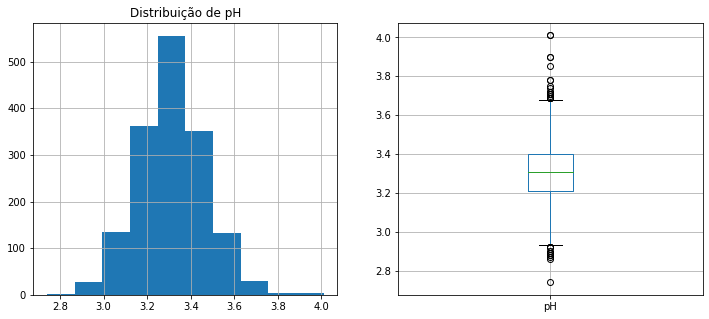

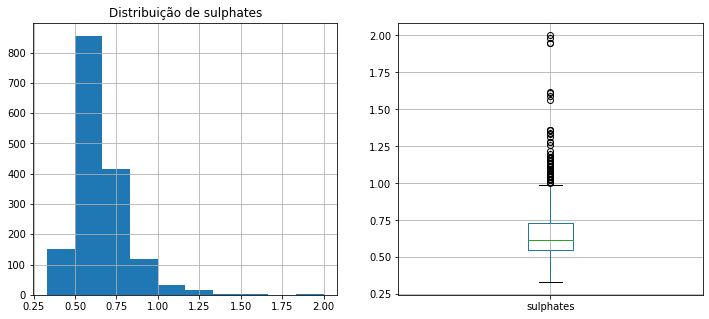

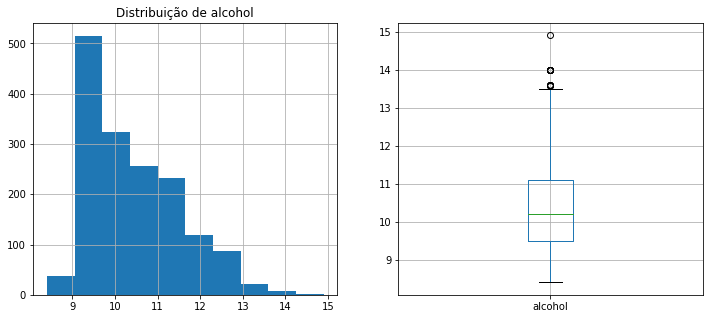

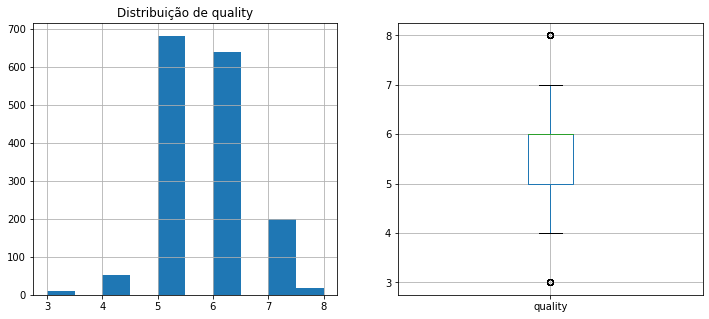

In [10]:
#exibição do grafica da distribuição dos dados
for col in df.columns:
    f, axes = plt.subplots(1,2, figsize = (12,5))
    df[col].hist(bins = 10, ax = axes[0])
    axes[0].set_title("Distribuição de "+ col)
    df.boxplot(column=col, ax = axes[1])
    plt.show()

#### PRE-PROCESSAMENTO

In [11]:
quality_cat = []
for dados in df['quality']:
    if dados >= 7:
        quality_cat.append('Excelente')
    elif dados >= 5:
        quality_cat.append('Otimo')
    else:
        quality_cat.append("Bom")

In [12]:
#atribuindo a nova variavel ao conjunto de dados
df['quality_cat'] = quality_cat

In [13]:
#resultado
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_cat
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,Otimo
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,Otimo
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,Otimo
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,Otimo
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,Otimo


In [14]:
#retirando coluna ambigua
df.drop(columns = 'quality', inplace= True)

In [15]:
#gerando X e y 
X = df[['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol']]
y = df['quality_cat']

In [16]:
#Verificando o balanceanmento da variavel y (target)
y.value_counts()

Otimo        1319
Excelente     217
Bom            63
Name: quality_cat, dtype: int64

In [17]:
X_treino, X_teste, y_treino, y_teste = train_test_split(X,y, test_size = 0.3 ,  stratify = y, shuffle = True)

In [18]:
#resultado da divisão
print("Conjunto de Teste")
print(X_teste.shape[0])
print(X_teste.shape[1])
print('\n')
print("Conjunto de Treinamento")
print(X_treino.shape[0])
print(X_treino.shape[1])

Conjunto de Teste
480
11


Conjunto de Treinamento
1119
11


#### ALGORITMO DE BASELINE

In [19]:
dummy = DummyClassifier(strategy= 'uniform', random_state= 1)

In [20]:
dummy.fit(X_treino,y_treino)
previsoes_dummy = dummy.predict(X_teste)

#### ESCOLHENDO UMA METRICA DE AVALIAÇÃO

In [21]:
def avaliacao_modelo(y_teste, y_pred):
    "Esta função retorna as principais metricas de avaliação de modelo"
    acuracia = metrics.accuracy_score(y_teste,y_pred)
    matrix_confusao = metrics.confusion_matrix(y_teste,y_pred)

    
    print('acuracia: ',acuracia)
    print('Matriz:   ',matrix_confusao)

In [22]:
avaliacao_modelo(y_teste, previsoes_dummy)

acuracia:  0.3145833333333333
Matriz:    [[  5   9   5]
 [ 20  19  26]
 [144 125 127]]


#### TESTANDO MODELOS ALTERNATIVOS

In [23]:
log_clf = LogisticRegression()

In [24]:
#### Verificando qual modelo tem um desempenho melhor
cross_val_score(log_clf, X, y, cv = 5).mean()

0.8280210866317054

In [25]:
##testando outro modelo
rnd_clf = RandomForestClassifier()

In [26]:
cross_val_score(rnd_clf, X, y, cv = 5).mean()

0.8117200230848731

#### TESTANDO MODELOS ASSEMBLE

In [27]:
dt_clf = DecisionTreeClassifier()

In [28]:
cross_val_score(dt_clf, X, y, cv = 5).mean()

0.7248009522775041

In [29]:
svc = SVC()

In [30]:
cross_val_score(svc, X, y, cv = 5).mean()

0.8192631761678835

#### TUNANDO O MODELO COM HIPERPARAMENTROS

In [43]:
penalidade = ['l1', 'l2']

In [44]:
C = uniform(loc = 0, scale = 4)

In [45]:
#instanciando o hiperparamentro
hyperparameters = dict(C=C, penalty=penalidade)

In [46]:
#instanciando o modelo
randomizesearch = RandomizedSearchCV(log_clf, hyperparameters, random_state= 1, n_iter= 100, cv =5, verbose = 0, n_jobs= -1)

In [47]:
melhor_modelo = randomizesearch.fit(X,y)

In [48]:
melhor_previsao = melhor_modelo.predict(X_teste)

In [49]:
avaliacao_modelo(y_teste ,melhor_previsao)

acuracia:  0.8479166666666667
Matriz:    [[  0   0  19]
 [  0  18  47]
 [  0   7 389]]


In [50]:
#entao instanciamos o melhor melhores paramentros encontrado na pequisa
melhor_modelo.best_estimator_

LogisticRegression(C=2.763587670067696, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [51]:
cross_val_score(melhor_modelo, X, y, cv=5,).mean()

0.8274019153157266

In [52]:
nova_class = np.array([7.1 ,0.73 ,0.03 ,1.5 ,0.079  , 9.0, 37.0 ,0.9948, 3.55,0.50, 9.5])
nova_class = nova_class.reshape([-1,11])
melhor_modelo.predict(nova_class)

array(['Otimo'], dtype=object)